In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [162]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [163]:
df.shape

(8425, 23)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [165]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [166]:
# Checking unique values in every column
for column in df.columns:
    print(f"\nUnique values in {column}:\n", df[column].value_counts())


Unique values in Date:
 2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

Unique values in Location:
 Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

Unique values in MinTemp:
  12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64

Unique values in MaxTemp:
 19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

Unique values in Rainfall:
 0.0      5299
0.2       406
0.

In [167]:
# For RainTomorrow, dropping rows with missing values as it is the target variable
df.dropna(subset=['RainTomorrow'])

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8419  2017-06-20    Uluru      3.5     21.8       0.0          NaN       NaN   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8419           E           31.0        ESE  ...        59.0         27.0   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8419       1024.7       1021.2       NaN       NaN      9.4     20.9   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8419         No            No  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  

[8186 rows x 23 columns]

In [168]:
# deleting these columns as they have many null values
df.drop(['Evaporation', 'Sunshine'], axis=1, inplace=True)

In [169]:
df.shape

(8425, 21)

In [170]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [171]:
# Handling missing values for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# For categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   WindGustDir    8425 non-null   object 
 6   WindGustSpeed  8425 non-null   float64
 7   WindDir9am     8425 non-null   object 
 8   WindDir3pm     8425 non-null   object 
 9   WindSpeed9am   8425 non-null   float64
 10  WindSpeed3pm   8425 non-null   float64
 11  Humidity9am    8425 non-null   float64
 12  Humidity3pm    8425 non-null   float64
 13  Pressure9am    8425 non-null   float64
 14  Pressure3pm    8425 non-null   float64
 15  Cloud9am       8425 non-null   float64
 16  Cloud3pm       8425 non-null   float64
 17  Temp9am        8425 non-null   float64
 18  Temp3pm 

In [173]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  Humidity3pm  \
0          W        WNW          20.0  ...         71.0         22.0   
1        NNW        WSW           4.0  ...         44.0         25.0   
2          W        WSW          19.0  ...         38.0         30.0   
3         SE          E          11.0  ...         45.0         16.0   
4        ENE         NW           7.0  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 21 columns]

In [174]:
df.duplicated().sum()

1663

In [175]:
df = df.drop_duplicates()

In [176]:
df.duplicated().sum()

0

We have dealth with null values and duplicate values now we will move ahead for EDA.

In [118]:
#Distribution of Target Variable 'RainTomorrow'

plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()


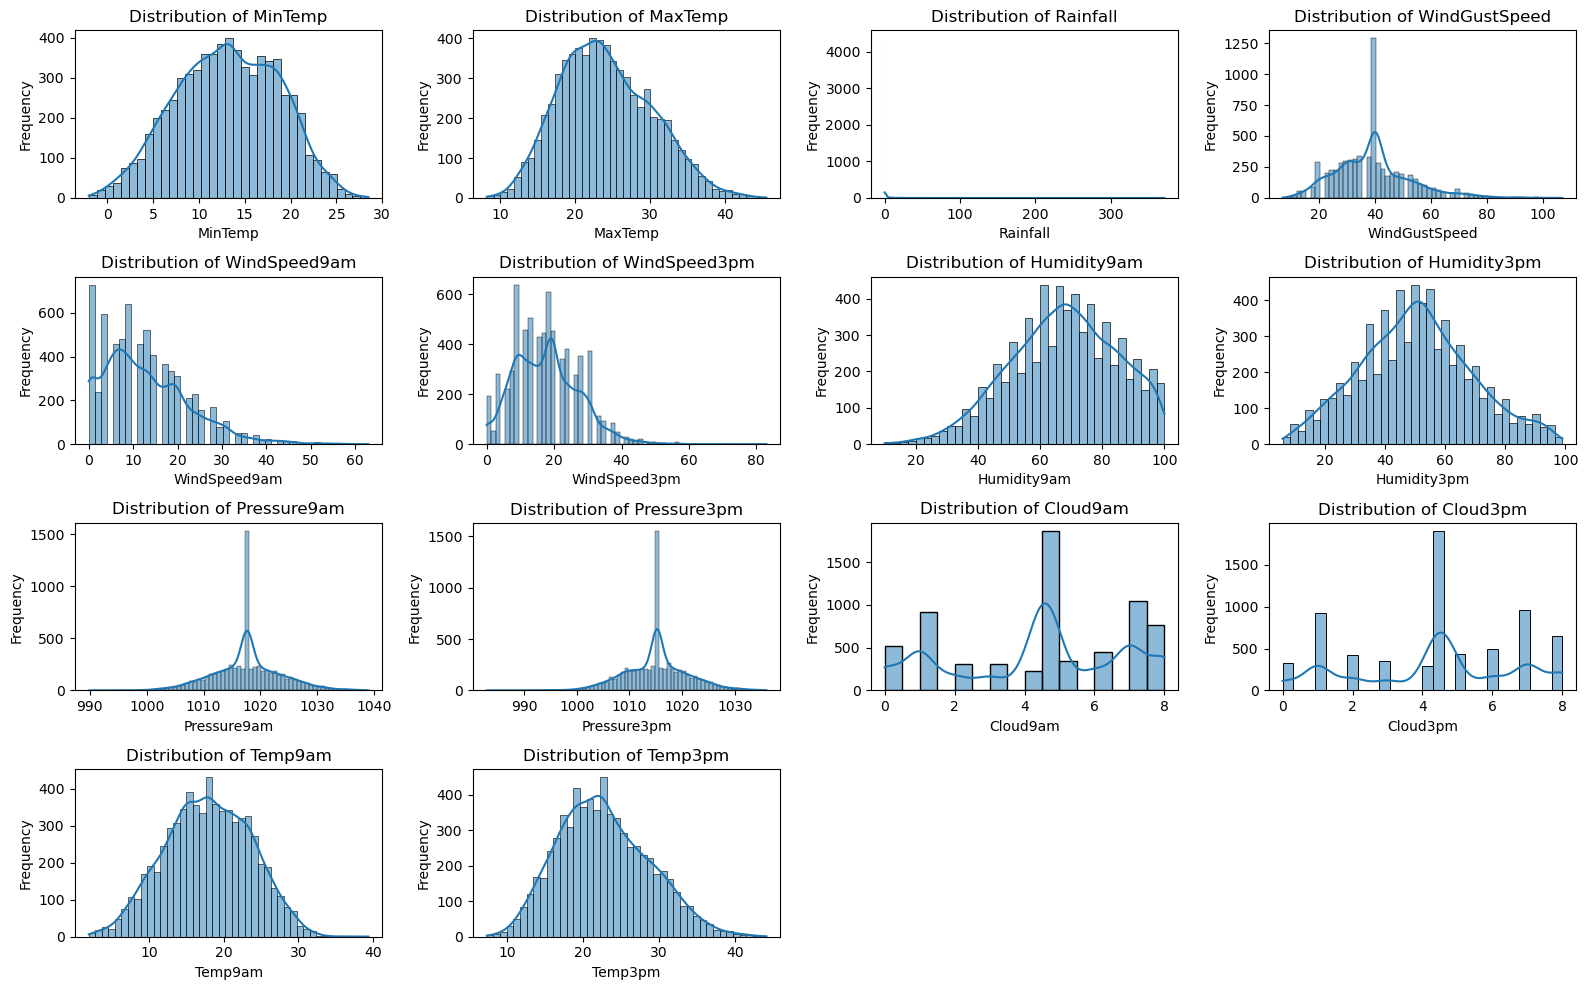

In [119]:
#Distribution of Numeric Features

plt.figure(figsize=(16, 10))
for i, feature in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


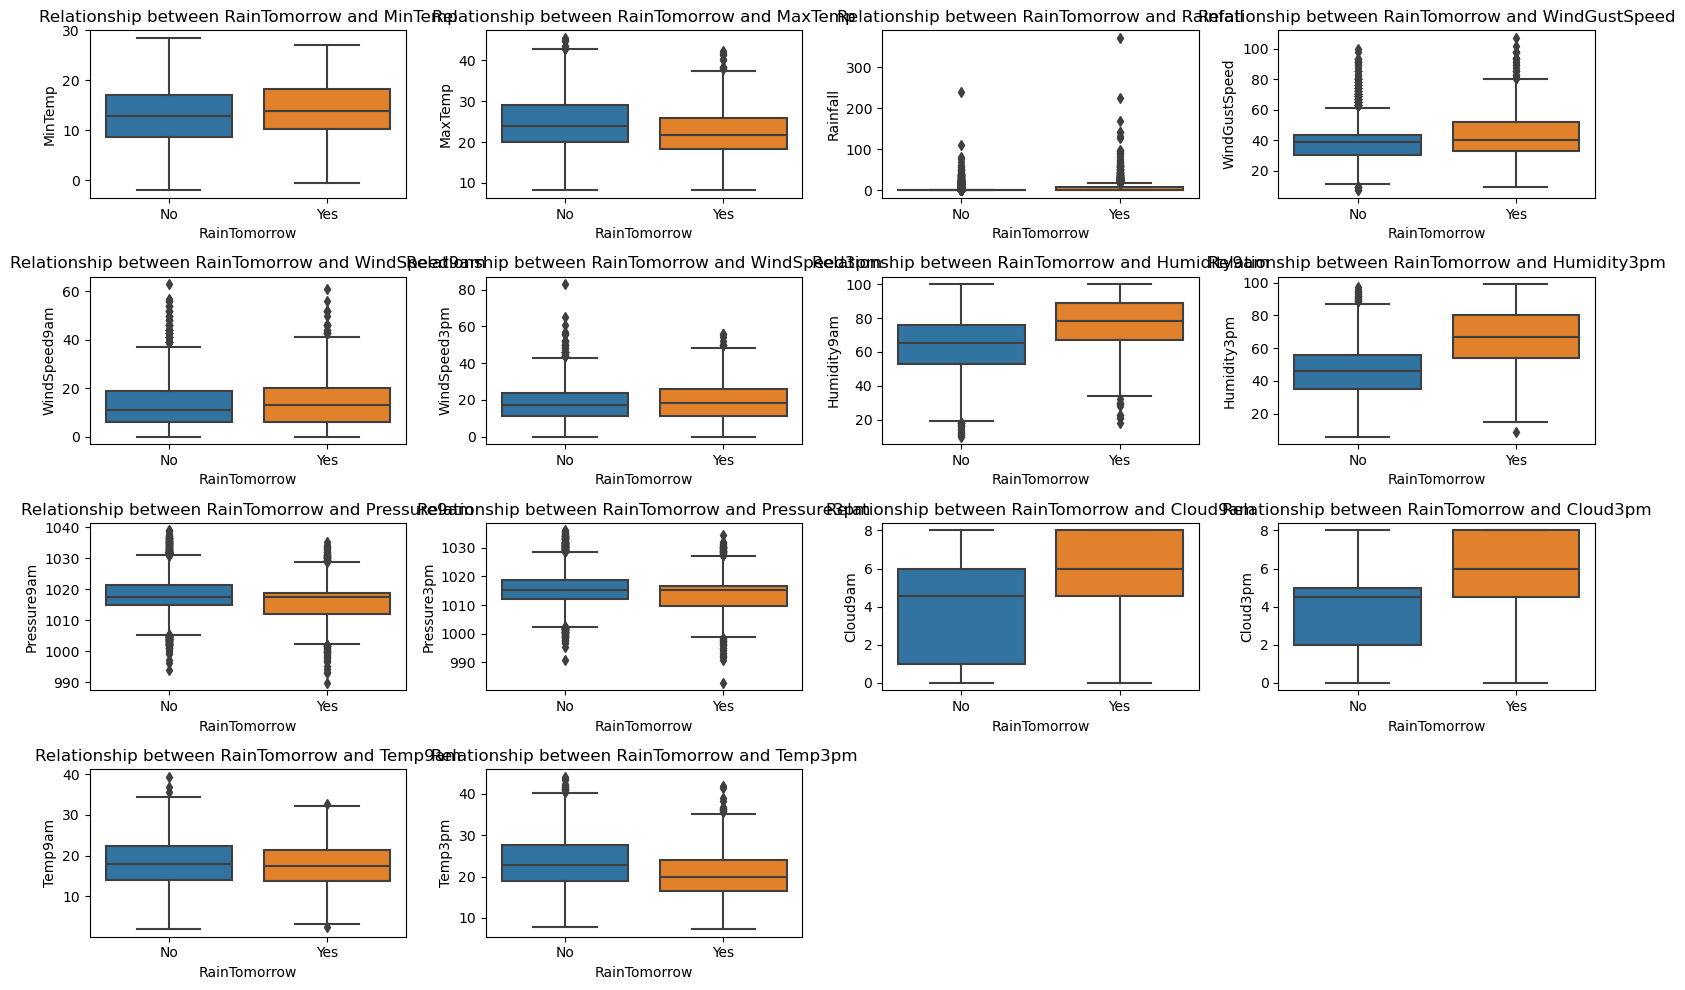

In [120]:
#Relationship between 'RainTomorrow' and Numeric Features

plt.figure(figsize=(16, 10))
for i, feature in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='RainTomorrow', y=feature, data=df)
    plt.title(f'Relationship between RainTomorrow and {feature}')

plt.tight_layout()
plt.show()

In [121]:
#Relationship between 'RainTomorrow' and Categorical Features

plt.figure(figsize=(16, 10))
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='RainTomorrow', data=df)
    plt.title(f'Relationship between RainTomorrow and {feature}')

plt.tight_layout()
plt.show()

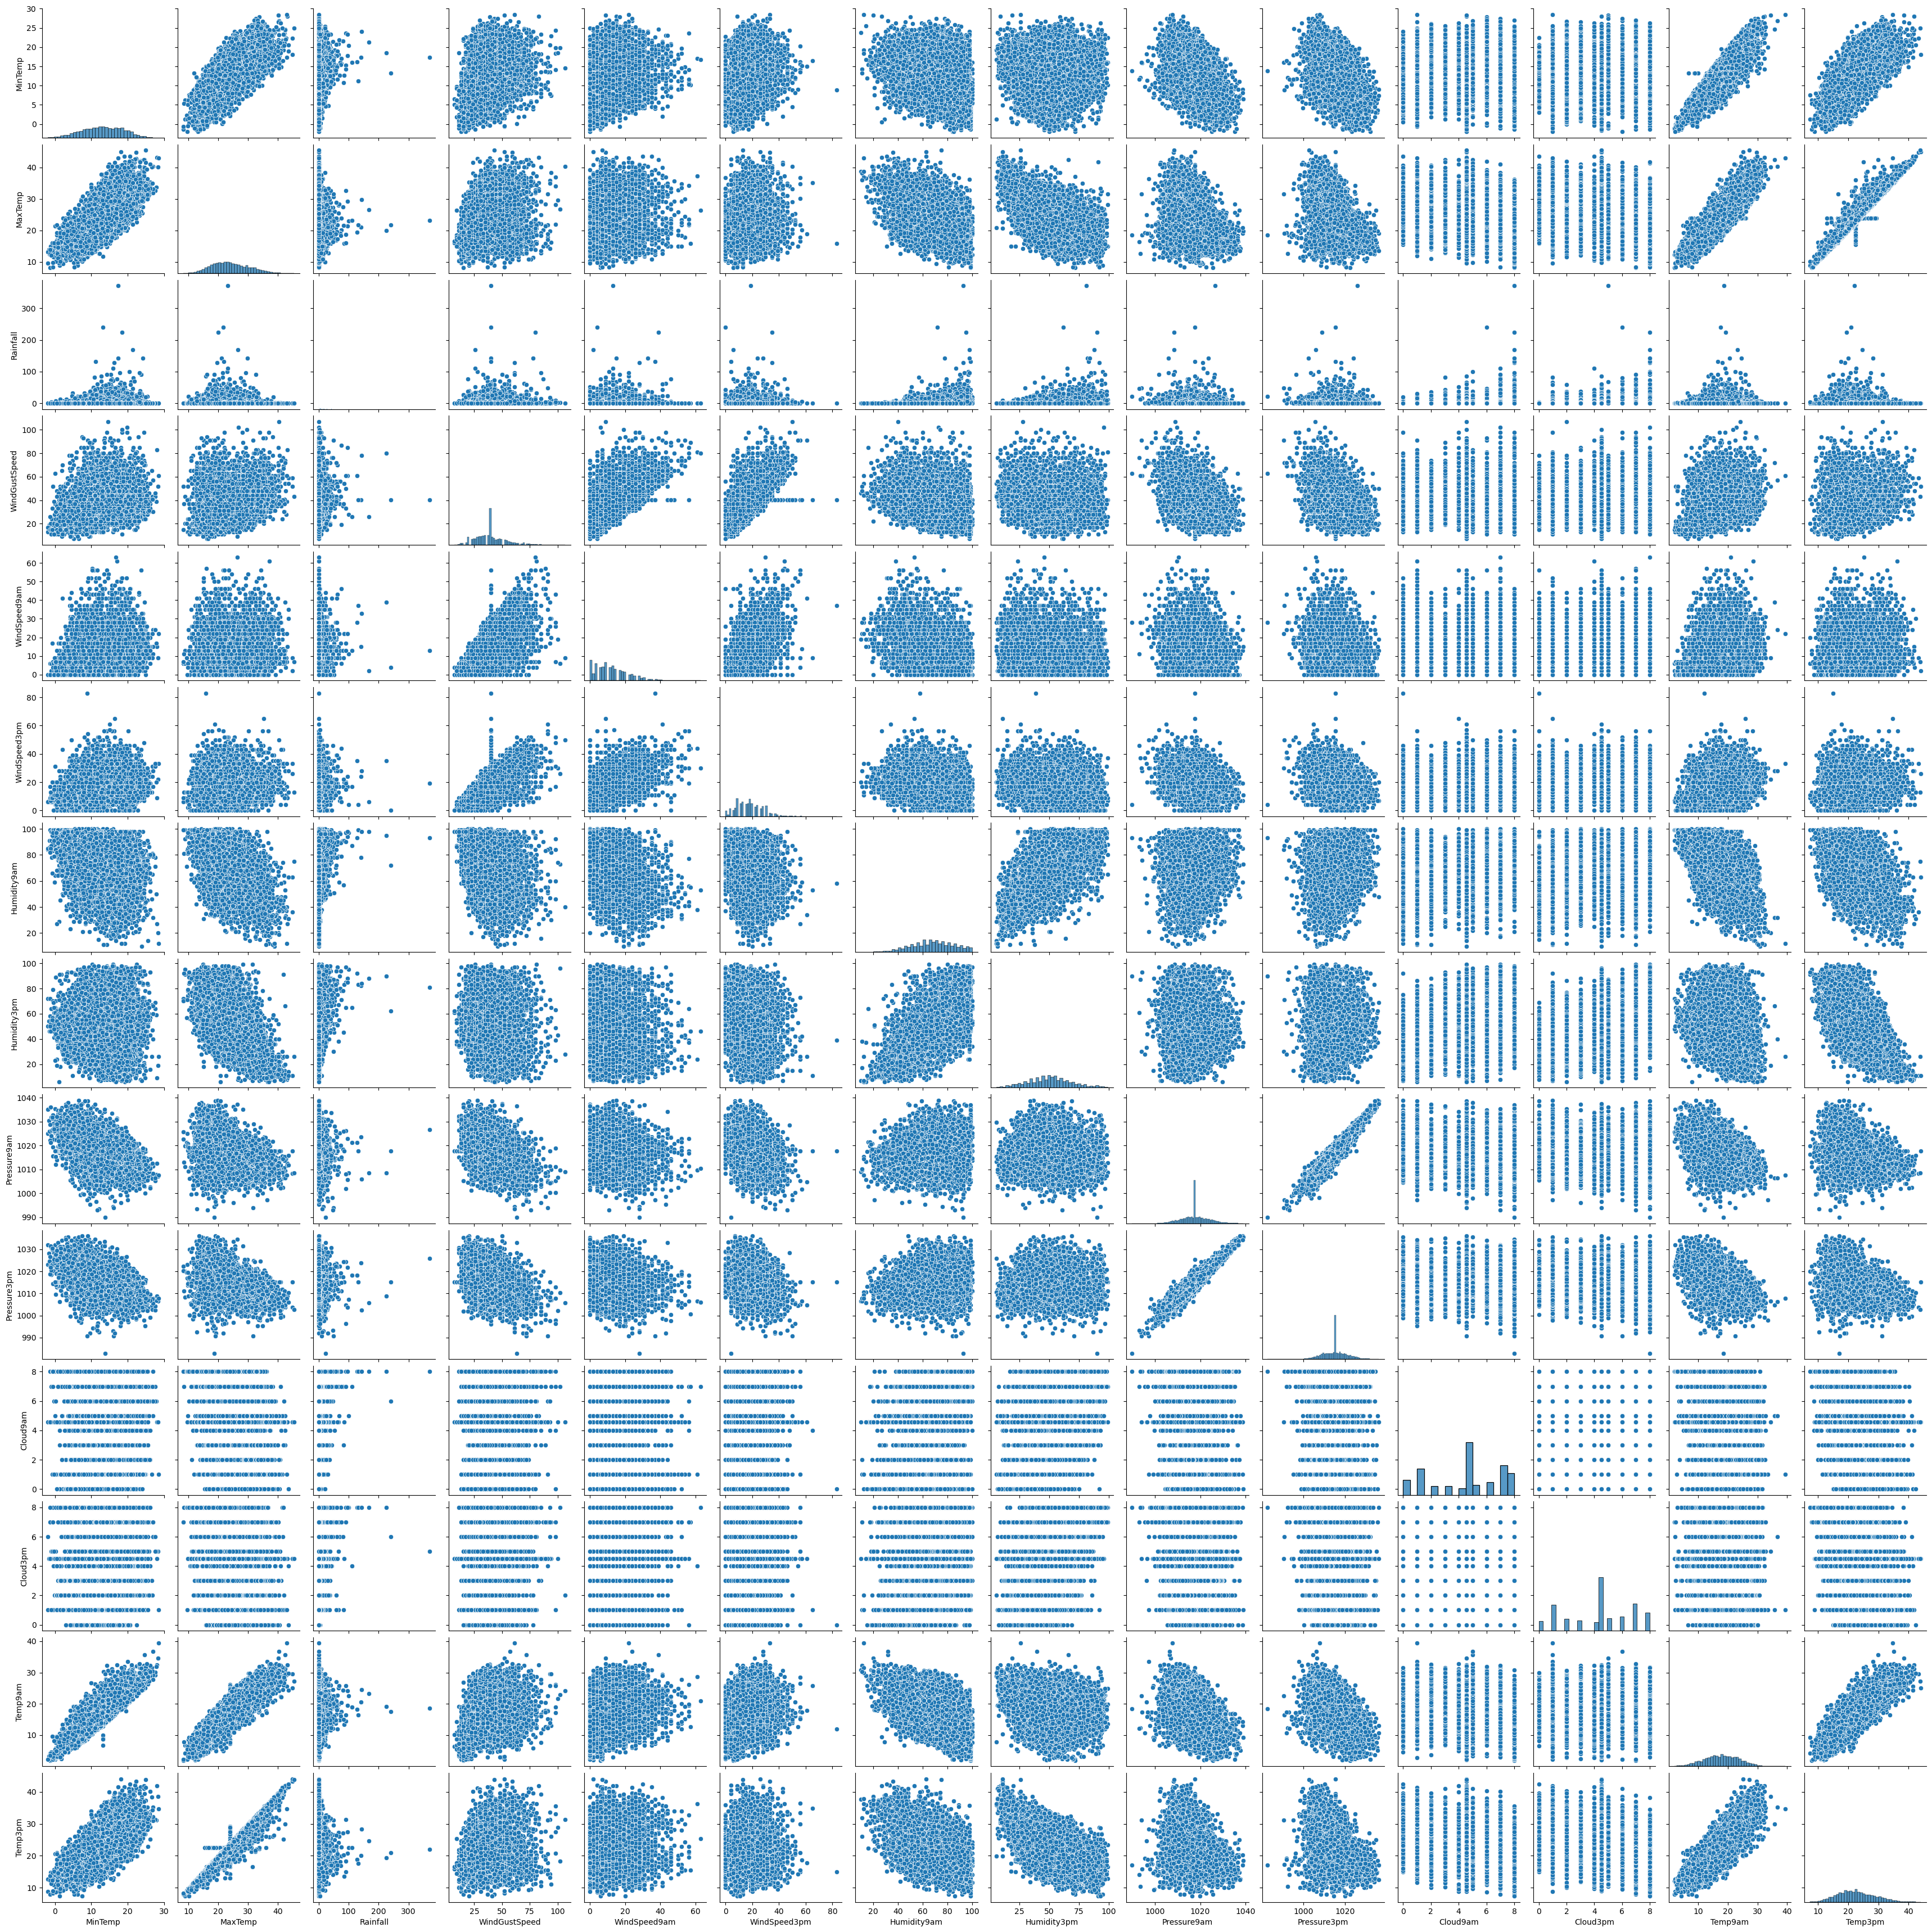

In [122]:
sns.pairplot(df[num_cols].dropna())
plt.show()

In [177]:
df.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  6762.000000  6762.000000  6762.000000    6762.000000   6762.000000   
mean     13.110016    24.096335     2.780674      39.144388     12.792133   
std       5.540673     6.130161    10.482770      13.382876      9.788112   
min      -2.000000     8.200000     0.000000       7.000000      0.000000   
25%       9.000000    19.600000     0.000000      30.000000      6.000000   
50%      13.193305    23.500000     0.000000      39.000000     11.000000   
75%      17.400000    28.400000     1.200000      46.000000     19.000000   
max      28.500000    45.500000   371.000000     107.000000     63.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean      17.585384    67.509082    50.478258  1017.629004  1015.142442   
std        9.549341    17.182723    18.498573     6.027916     5.967815   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%       11.000000    56.000000    38.000000  1014.200000  1011.500000   
50%       17.000000    68.000000    50.000000  1017.640233  1015.236075   
75%       24.000000    80.000000    62.000000  1020.900000  1018.400000   
max       83.000000   100.000000    99.000000  1039.000000  1036.000000   

          Cloud9am     Cloud3pm      Temp9am      Temp3pm  
count  6762.000000  6762.000000  6762.000000  6762.000000  
mean      4.400224     4.372235    17.894035    22.704947  
std       2.476781     2.324720     5.722423     5.971925  
min       0.000000     0.000000     1.900000     7.300000  
25%       2.000000     3.000000    13.900000    18.400000  
50%       4.566622     4.503183    17.900000    22.300000  
75%       7.000000     6.000000    22.200000    26.800000  
max       8.000000     8.000000    39.400000    44.100000

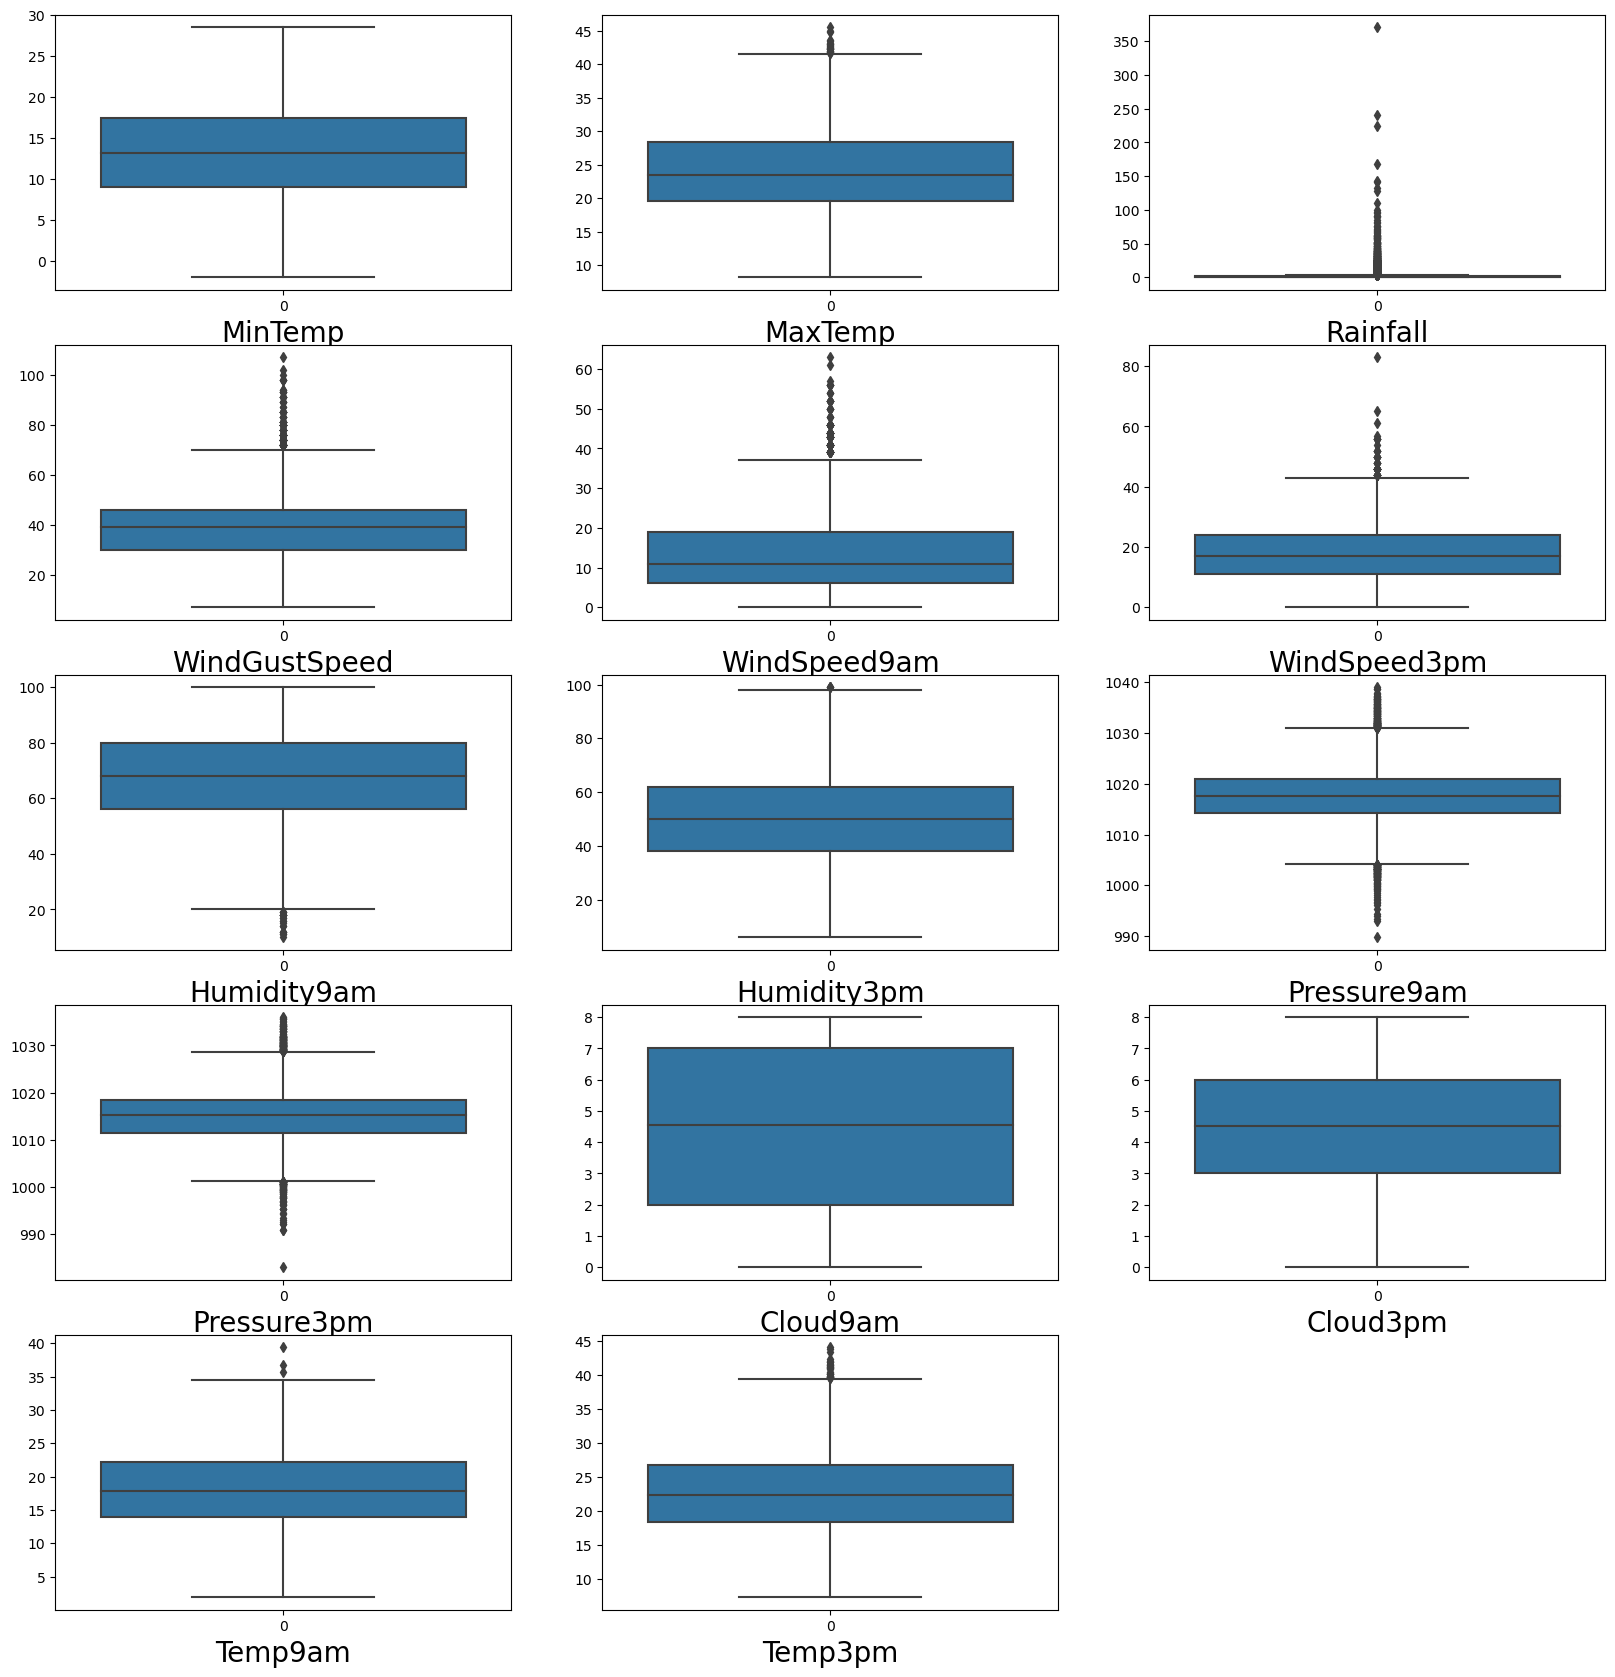

In [178]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in num_cols:
    if graph<=16: 
        plt.subplot (6,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

There are outliers present in some columns(Temp9am, Temp3pm, MaxTemp, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Rainfall, Pressure9am, Pressure3pm, Temp9am, Temp3pm )

Now we will try to remove outliers using zscore and IQR method and decide which works better. we will not remove outliers from rainfall as it is target variable.

In [179]:
df.shape

(6762, 21)

In [180]:
out_features=df[['Temp9am', 'Temp3pm', 'MaxTemp', 'WindGustSpeed', 
                 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']]

# 1st quantile
Q1=out_features.quantile (0.25)

# 3rd quantile
Q3=out_features.quantile (0.75)

#IQR
IQR=Q3- Q1

df1=df[~((df< (Q1-1.5 *IQR)) | (df> (Q3 + 1.5* IQR))).any (axis=1)]

In [181]:
df1.shape

(6194, 21)

In [182]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 8.399881691807158


In [183]:
from scipy.stats import zscore
z = np.abs(zscore(out_features))
z

Temp9am   Temp3pm   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     0.173722  0.151545  0.195170       0.362850      0.736444      0.671784   
1     0.121292  0.267112  0.163738       0.362850      0.898312      0.462330   
2     0.542811  0.082903  0.261622       0.512305      0.634272      0.881238   
3     0.035995  0.635529  0.636844       1.131708      0.183106      0.899122   
4     0.016434  1.171410  1.338345       0.138666      0.591796      0.252876   
...        ...       ...       ...            ...           ...           ...   
8420  1.362117  0.051067  0.113600       0.608613      0.021238      0.689668   
8421  1.222306  0.300604  0.196366       1.281164      0.021238      0.899122   
8422  0.942683  0.568544  0.457390       0.160246      0.387451      0.899122   
8423  0.488297  0.551798  0.473704       0.832796      0.021238      1.108576   
8424  0.505773  0.302261  0.038560       0.076976      0.429927      0.061306   

      Pressure9am  Pressure3pm  
0        1.647292     1.347736  
1        1.166162     1.230431  
2        1.663883     1.079611  
3        0.004812     0.392542  
4        1.132980     1.532071  
...           ...          ...  
8420     1.156538     0.864293  
8421     0.974040     0.663199  
8422     0.559272     0.277770  
8423     0.293821     0.227497  
8424     0.426546     0.462106  

[6762 rows x 8 columns]

In [184]:
#threshold =3
np.where(z>3)

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
          62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
         381,  405,  406,  407,  466,  466,  563,  567,  568,  568,  569,
         602,  602,  603,  683,  683,  748,  748,  795,  928,  980,  980,
        1189, 1535, 1587, 1644, 1665, 1898, 1903, 1945, 2016, 2028, 2043,
        2074, 2186, 2219, 2219, 2230, 2500, 2505, 2527, 2527, 2859, 2900,
        3027, 3051, 3055, 3058, 3059, 3059, 3060, 3066, 3067, 3067, 3067,
        3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099, 3141, 3153,
        3153, 3157, 3167, 3169, 3172, 3212, 3212, 3212, 3234, 3278, 3278,
        3280, 3291, 3302, 3302, 3303, 3360, 3446, 3449, 3449, 3449, 3450,
        3450, 3450, 3458, 3471, 3491, 3509, 3557, 3602, 3603, 3608, 3609,
        3617, 3618, 3628, 3675, 3675, 3676, 3676, 3676, 3678, 3683, 3701,
        3714, 3716, 3766, 3766, 3773, 3786, 3786, 3805, 3806, 3820, 3825,
        3826, 3826, 3879, 3879, 3923, 

In [185]:
# now removing the data above Zscore and creating new DF
df2 = df[(z<3).all(axis=1)]
df2.shape

(6554, 21)

In [186]:
print("Data Loss Percentage After removing outliers with ZSCORE method-", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with ZSCORE method- 3.0760130139012127


As we can see data loss is less while using zscore as compared to IQR method. so we will consider zscore method.

In [187]:
df=df2

As we have removed ouliers now we will check for skewness in the dataset.

In [188]:
# checking for skewness
df.skew()                # range is -0.5 to +0.5

MinTemp          -0.093128
MaxTemp           0.274372
Rainfall         14.153742
WindGustSpeed     0.434383
WindSpeed9am      0.672259
WindSpeed3pm      0.334865
Humidity9am      -0.262233
Humidity3pm       0.151537
Pressure9am       0.061605
Pressure3pm       0.078392
Cloud9am         -0.286829
Cloud3pm         -0.218246
Temp9am          -0.069814
Temp3pm           0.297960
dtype: float64

There are some skewness present in column 'WIndSpeed9am' and 'Rainfall'.
we will remove it by using different trasformation mehods. We will not remove skewness from Rainfall as it is target variable.

In [189]:
df['WindSpeed9am'] = np.cbrt(df['WindSpeed9am'])

In [190]:
df.skew()

MinTemp          -0.093128
MaxTemp           0.274372
Rainfall         14.153742
WindGustSpeed     0.434383
WindSpeed9am     -1.182974
WindSpeed3pm      0.334865
Humidity9am      -0.262233
Humidity3pm       0.151537
Pressure9am       0.061605
Pressure3pm       0.078392
Cloud9am         -0.286829
Cloud3pm         -0.218246
Temp9am          -0.069814
Temp3pm           0.297960
dtype: float64

In [191]:
df['WindSpeed9am'] = np.sqrt(df['WindSpeed9am'])

In [192]:
df.skew()

MinTemp          -0.093128
MaxTemp           0.274372
Rainfall         14.153742
WindGustSpeed     0.434383
WindSpeed9am     -2.017698
WindSpeed3pm      0.334865
Humidity9am      -0.262233
Humidity3pm       0.151537
Pressure9am       0.061605
Pressure3pm       0.078392
Cloud9am         -0.286829
Cloud3pm         -0.218246
Temp9am          -0.069814
Temp3pm           0.297960
dtype: float64

In [193]:
df['WindSpeed9am'] = np.exp(df['WindSpeed9am'])

In [194]:
df.skew()

MinTemp          -0.093128
MaxTemp           0.274372
Rainfall         14.153742
WindGustSpeed     0.434383
WindSpeed9am     -1.216928
WindSpeed3pm      0.334865
Humidity9am      -0.262233
Humidity3pm       0.151537
Pressure9am       0.061605
Pressure3pm       0.078392
Cloud9am         -0.286829
Cloud3pm         -0.218246
Temp9am          -0.069814
Temp3pm           0.297960
dtype: float64

In [195]:
df['WindSpeed9am'] = np.log1p(df['WindSpeed9am'])

In [196]:
df.skew()

MinTemp          -0.093128
MaxTemp           0.274372
Rainfall         14.153742
WindGustSpeed     0.434383
WindSpeed9am     -1.841766
WindSpeed3pm      0.334865
Humidity9am      -0.262233
Humidity3pm       0.151537
Pressure9am       0.061605
Pressure3pm       0.078392
Cloud9am         -0.286829
Cloud3pm         -0.218246
Temp9am          -0.069814
Temp3pm           0.297960
dtype: float64

In [197]:
df['WindSpeed9am'] = df['WindSpeed9am'] ** 2

In [198]:
df.skew()

MinTemp          -0.093128
MaxTemp           0.274372
Rainfall         14.153742
WindGustSpeed     0.434383
WindSpeed9am     -1.401293
WindSpeed3pm      0.334865
Humidity9am      -0.262233
Humidity3pm       0.151537
Pressure9am       0.061605
Pressure3pm       0.078392
Cloud9am         -0.286829
Cloud3pm         -0.218246
Temp9am          -0.069814
Temp3pm           0.297960
dtype: float64

In [199]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
df['WindSpeed9am'], _ = yeojohnson(df['WindSpeed9am'] + 1)


In [200]:
df.skew()

MinTemp          -0.093128
MaxTemp           0.274372
Rainfall         14.153742
WindGustSpeed     0.434383
WindSpeed9am     -0.239371
WindSpeed3pm      0.334865
Humidity9am      -0.262233
Humidity3pm       0.151537
Pressure9am       0.061605
Pressure3pm       0.078392
Cloud9am         -0.286829
Cloud3pm         -0.218246
Temp9am          -0.069814
Temp3pm           0.297960
dtype: float64

We have removed skewness completely now we will move ahead see correlation.

In [201]:
# calculating the correlation matrix of the DataFrame
cor = df.corr()
cor

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.725894  0.093658       0.244622      0.195100   
MaxTemp        0.725894  1.000000 -0.085957       0.168823      0.078205   
Rainfall       0.093658 -0.085957  1.000000       0.075996      0.043763   
WindGustSpeed  0.244622  0.168823  0.075996       1.000000      0.500359   
WindSpeed9am   0.195100  0.078205  0.043763       0.500359      1.000000   
WindSpeed3pm   0.192944  0.122265  0.015570       0.604865      0.532488   
Humidity9am   -0.142869 -0.419380  0.225991      -0.260692     -0.389209   
Humidity3pm    0.082584 -0.420902  0.240853      -0.093839     -0.118646   
Pressure9am   -0.448320 -0.351431 -0.052704      -0.361703     -0.154377   
Pressure3pm   -0.447959 -0.430204 -0.012434      -0.326171     -0.125438   
Cloud9am       0.093376 -0.245440  0.191783      -0.003091     -0.042136   
Cloud3pm       0.044739 -0.241946  0.154741       0.035875     -0.006598   
Temp9am        0.890806  0.865301 -0.003234       0.223529      0.188190   
Temp3pm        0.695125  0.974920 -0.090884       0.137077      0.063288   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.192944    -0.142869     0.082584    -0.448320   
MaxTemp            0.122265    -0.419380    -0.420902    -0.351431   
Rainfall           0.015570     0.225991     0.240853    -0.052704   
WindGustSpeed      0.604865    -0.260692    -0.093839    -0.361703   
WindSpeed9am       0.532488    -0.389209    -0.118646    -0.154377   
WindSpeed3pm       1.000000    -0.253547    -0.095313    -0.225821   
Humidity9am       -0.253547     1.000000     0.639641     0.132138   
Humidity3pm       -0.095313     0.639641     1.000000    -0.004734   
Pressure9am       -0.225821     0.132138    -0.004734     1.000000   
Pressure3pm       -0.181562     0.171854     0.065795     0.961411   
Cloud9am          -0.019898     0.421685     0.422104    -0.060045   
Cloud3pm          -0.035437     0.324826     0.453660    -0.062431   
Temp9am            0.215216    -0.399559    -0.124659    -0.427957   
Temp3pm            0.101080    -0.414191    -0.490141    -0.313863   

               Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
MinTemp          -0.447959  0.093376  0.044739  0.890806  0.695125  
MaxTemp          -0.430204 -0.245440 -0.241946  0.865301  0.974920  
Rainfall         -0.012434  0.191783  0.154741 -0.003234 -0.090884  
WindGustSpeed    -0.326171 -0.003091  0.035875  0.223529  0.137077  
WindSpeed9am     -0.125438 -0.042136 -0.006598  0.188190  0.063288  
WindSpeed3pm     -0.181562 -0.019898 -0.035437  0.215216  0.101080  
Humidity9am       0.171854  0.421685  0.324826 -0.399559 -0.414191  
Humidity3pm       0.065795  0.422104  0.453660 -0.124659 -0.490141  
Pressure9am       0.961411 -0.060045 -0.062431 -0.427957 -0.313863  
Pressure3pm       1.000000 -0.001869 -0.006903 -0.459795 -0.400495  
Cloud9am         -0.001869  1.000000  0.596169 -0.137173 -0.259992  
Cloud3pm         -0.006903  0.596169  1.000000 -0.123162 -0.285144  
Temp9am          -0.459795 -0.137173 -0.123162  1.000000  0.834331  
Temp3pm          -0.400495 -0.259992 -0.285144  0.834331  1.000000

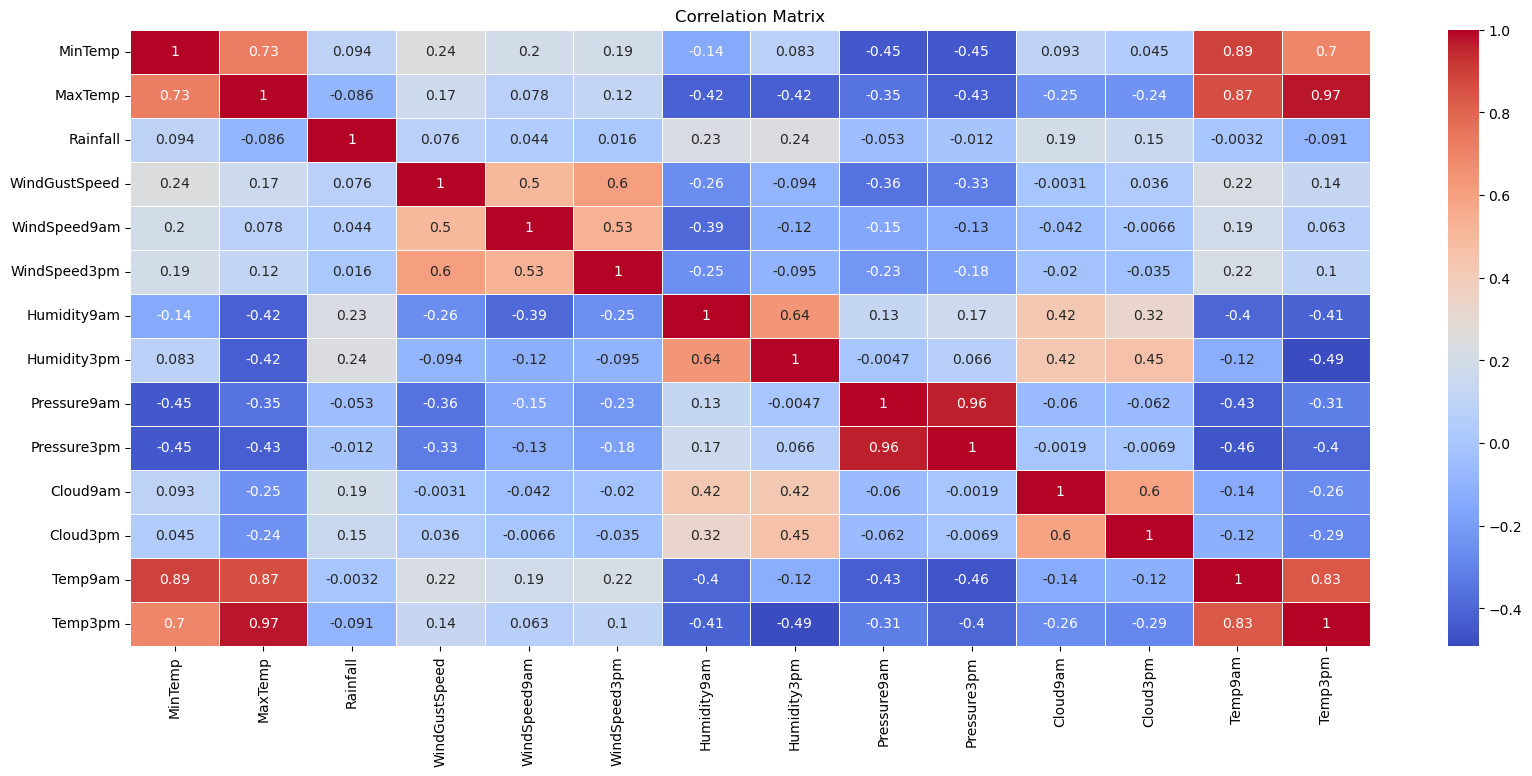

In [202]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

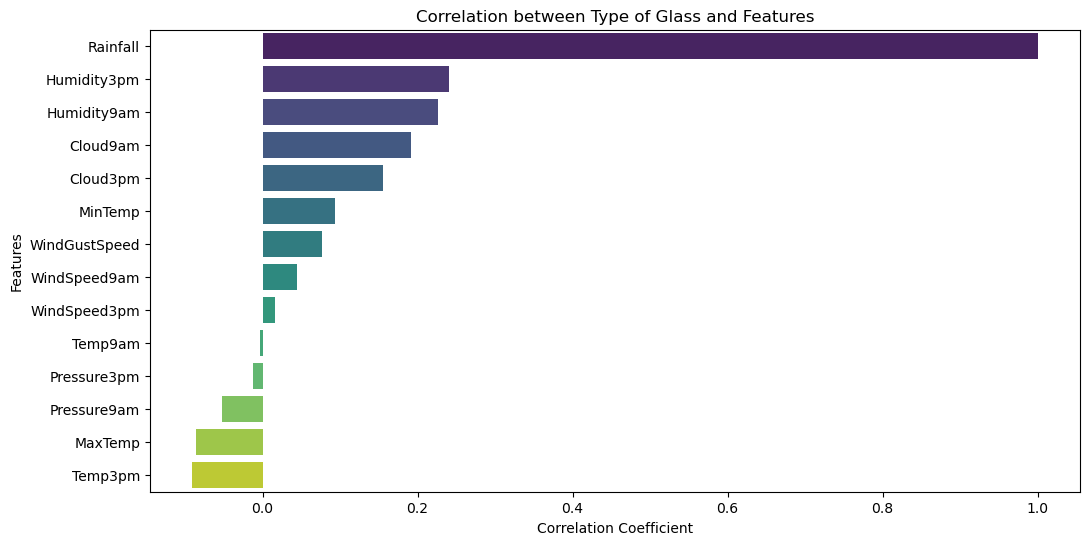

In [203]:
correlation_with_target = df.corr()['Rainfall'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title(f'Correlation between Type of Glass and Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [204]:
df3 = df.copy()

In [205]:
# Converting 'RainToday' and 'RainTomorrow' to binary values

df3['RainToday'] = df3['RainToday'].map({'No': 0, 'Yes': 1})
df3['RainTomorrow'] = df3['RainTomorrow'].map({'No': 0, 'Yes': 1})


In [207]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
df3['WindGustDir'] = le.fit_transform(df3['WindGustDir'].astype(str))
df3['WindDir9am'] = le.fit_transform(df3['WindDir9am'].astype(str))
df3['WindDir3pm'] = le.fit_transform(df3['WindDir3pm'].astype(str))


In [208]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [210]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

df3['Location'] = OE.fit_transform(df3['Location'].values.reshape(-1, 1))
df3

Date  Location  MinTemp    MaxTemp  Rainfall  WindGustDir  \
0    2008-12-01       1.0     13.4  22.900000       0.6           13   
1    2008-12-02       1.0      7.4  25.100000       0.0           14   
2    2008-12-03       1.0     12.9  25.700000       0.0           15   
3    2008-12-04       1.0      9.2  28.000000       0.0            4   
4    2008-12-05       1.0     17.5  32.300000       1.0           13   
...         ...       ...      ...        ...       ...          ...   
8420 2017-06-21       9.0      2.8  23.400000       0.0            0   
8421 2017-06-22       9.0      3.6  25.300000       0.0            6   
8422 2017-06-23       9.0      5.4  26.900000       0.0            3   
8423 2017-06-24       9.0      7.8  27.000000       0.0            9   
8424 2017-06-25       9.0     14.9  23.859976       0.0            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0         44.000000          13          14     98.267650  ...         71.0   
1         44.000000           6          15     45.614225  ...         44.0   
2         46.000000          13          15     95.534968  ...         38.0   
3         24.000000           9           0     71.864902  ...         45.0   
4         41.000000           1           7     58.002847  ...         82.0   
...             ...         ...         ...           ...  ...          ...   
8420      31.000000           9           1     78.161680  ...         51.0   
8421      22.000000           9           3     78.161680  ...         56.0   
8422      37.000000           9          14     65.192280  ...         53.0   
8423      28.000000          10           3     78.161680  ...         51.0   
8424      40.174469           2           2     89.947065  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1            25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2            30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3            16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4            33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183     10.1   
8421         21.0       1023.5       1019.1  4.566622  4.503183     10.9   
8422         24.0       1021.0       1016.8  4.566622  4.503183     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             0  

[6554 rows x 21 columns]

In [211]:
df3.set_index('Date', inplace=True)

In [212]:
df3.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
Date                                                                           
2008-12-01       1.0     13.4     22.9       0.6           13           44.0   
2008-12-02       1.0      7.4     25.1       0.0           14           44.0   
2008-12-03       1.0     12.9     25.7       0.0           15           46.0   
2008-12-04       1.0      9.2     28.0       0.0            4           24.0   
2008-12-05       1.0     17.5     32.3       1.0           13           41.0   

            WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date                                                                          
2008-12-01          13          14     98.267650          24.0         71.0   
2008-12-02           6          15     45.614225          22.0         44.0   
2008-12-03          13          15     95.534968          26.0         38.0   
2008-12-04           9           0     71.864902           9.0         45.0   
2008-12-05           1           7     58.002847          20.0         82.0   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2008-12-01         22.0       1007.7       1007.1  8.000000  4.503183   
2008-12-02         25.0       1010.6       1007.8  4.566622  4.503183   
2008-12-03         30.0       1007.6       1008.7  4.566622  2.000000   
2008-12-04         16.0       1017.6       1012.8  4.566622  4.503183   
2008-12-05         33.0       1010.8       1006.0  7.000000  8.000000   

            Temp9am  Temp3pm  RainToday  RainTomorrow  
Date                                                   
2008-12-01     16.9     21.8          0             0  
2008-12-02     17.2     24.3          0             0  
2008-12-03     21.0     23.2          0             0  
2008-12-04     18.1     26.5          0             0  
2008-12-05     17.8     29.7          0             0

According to the problem

we have 2 Tasks: One of Classification and other of Regression

we will start with Classification where target variable will be 'RainTomorrow'.

In [213]:
x = df3.drop('RainTomorrow', axis=1)
y = df3['RainTomorrow']

In [214]:
# standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0    -1.389776  0.057301 -0.194116 -0.210283     1.245979       0.459384   
1    -1.389776 -1.027656  0.171024 -0.270234     1.454725       0.459384   
2    -1.389776 -0.033112  0.270608 -0.270234     1.663471       0.622393   
3    -1.389776 -0.702169  0.652345 -0.270234    -0.632736      -1.170706   
4    -1.389776  0.798689  1.366027 -0.170315     1.245979       0.214870   
...        ...       ...       ...       ...          ...            ...   
6549  1.193031 -1.859457 -0.111129 -0.270234    -1.467720      -0.600175   
6550  1.193031 -1.714796  0.204219 -0.270234    -0.215243      -1.333715   
6551  1.193031 -1.389309  0.469775 -0.270234    -0.841482      -0.111148   
6552  1.193031 -0.955326  0.486372 -0.270234     0.410995      -0.844688   
6553  1.193031  0.328540 -0.034786 -0.270234    -0.841482       0.147586   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0       1.308340    1.372245      0.853160      0.751671     0.191722   
1      -0.229712    1.595259     -0.750262      0.531029    -1.390783   
2       1.308340    1.595259      0.769943      0.972313    -1.742451   
3       0.429453   -1.749946      0.049134     -0.903143    -1.332172   
4      -1.328321   -0.188850     -0.372999      0.310387     0.836446   
...          ...         ...           ...           ...          ...   
6549    0.429453   -1.526932      0.240885     -0.682501    -0.980504   
6550    0.429453   -1.080905      0.240885     -0.903143    -0.687448   
6551    0.429453    1.372245     -0.154064     -0.903143    -0.863282   
6552    0.649175   -1.080905      0.240885     -1.123785    -0.980504   
6553   -1.108599   -1.303919      0.599778     -0.020576    -0.335780   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.558353    -1.751620    -1.436399  1.454892  0.064542 -0.171341   
1       -1.394856    -1.245611    -1.313044  0.070371  0.064542 -0.118513   
2       -1.122360    -1.769068    -1.154444  0.070371 -1.012059  0.550636   
3       -1.885348    -0.024209    -0.431934  0.070371  0.064542  0.039970   
4       -0.958863    -1.210713    -1.630243  1.051639  1.568498 -0.012858   
...           ...          ...          ...       ...       ...       ...   
6549    -1.449355     1.197192     0.889730  0.070371  0.064542 -1.368766   
6550    -1.612852     1.005258     0.678264  0.070371  0.064542 -1.227892   
6551    -1.449355     0.569043     0.272954  0.070371  0.064542 -0.946145   
6552    -1.449355     0.289865     0.220087 -0.561375 -1.012059 -0.488306   
6553    -0.795365     0.429454     0.466798  1.454892  1.568498 -0.505915   

       Temp3pm  RainToday  
0    -0.152069  -0.549732  
1     0.273857  -0.549732  
2     0.086450  -0.549732  
3     0.648672  -0.549732  
4     1.193858  -0.549732  
...        ...        ...  
6549 -0.049846  -0.549732  
6550  0.307931  -0.549732  
6551  0.580524  -0.549732  
6552  0.563487  -0.549732  
6553 -0.305402  -0.549732  

[6554 rows x 19 columns]

In [215]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

         Variable        VIF
0        Location   1.149037
1         MinTemp   8.674232
2         MaxTemp  26.216006
3        Rainfall   1.308912
4     WindGustDir   1.605976
5   WindGustSpeed   2.101196
6      WindDir9am   1.350030
7      WindDir3pm   1.466508
8    WindSpeed9am   1.913464
9    WindSpeed3pm   1.906560
10    Humidity9am   4.053483
11    Humidity3pm   5.445436
12    Pressure9am  19.783387
13    Pressure3pm  19.131037
14       Cloud9am   1.884978
15       Cloud3pm   1.738286
16        Temp9am  17.304833
17        Temp3pm  32.271535
18      RainToday   1.611211


There is multicoliinearity exists so we will remove it by removing column with highest vif value more than 10 that is Temp3pm.

In [216]:
x.drop('Temp3pm', axis=1, inplace=True)

In [217]:
# Again Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

         Variable        VIF
0        Location   1.148441
1         MinTemp   8.590299
2         MaxTemp   9.445957
3        Rainfall   1.306546
4     WindGustDir   1.602172
5   WindGustSpeed   2.093289
6      WindDir9am   1.348668
7      WindDir3pm   1.465885
8    WindSpeed9am   1.913447
9    WindSpeed3pm   1.901809
10    Humidity9am   3.605504
11    Humidity3pm   3.739388
12    Pressure9am  19.343507
13    Pressure3pm  18.758267
14       Cloud9am   1.884093
15       Cloud3pm   1.727296
16        Temp9am  16.207357
17      RainToday   1.609070


In [219]:
x.drop('Pressure9am', axis=1,inplace= True)

In [220]:
# Again Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

         Variable        VIF
0        Location   1.146784
1         MinTemp   8.434865
2         MaxTemp   9.096131
3        Rainfall   1.306357
4     WindGustDir   1.585563
5   WindGustSpeed   2.071705
6      WindDir9am   1.327312
7      WindDir3pm   1.397326
8    WindSpeed9am   1.906066
9    WindSpeed3pm   1.893217
10    Humidity9am   3.605481
11    Humidity3pm   3.737412
12    Pressure3pm   1.442436
13       Cloud9am   1.884093
14       Cloud3pm   1.723071
15        Temp9am  16.177090
16      RainToday   1.599328


We have removed multicollinearity. We will keep Tmp9am as it is as it may affect our model if we remove it.

In [221]:
# Checking for best random state and accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_RS = None
best_accuracy = 0.0

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_RS = i

print(f'Best Random State: {best_RS}')
print(f'Best Accuracy: {best_accuracy:.2f}')


Best Random State: 39
Best Accuracy: 0.80


In [222]:
#splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_RS)

Now, We will train, evaluate and cross-validate the models. The results, including accuracy, classification report, confusion matrix, and cross-validation scores, will be printed for each model.

In [223]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

In [224]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    print("\n" + "="*40 + "\n")


Results for LogisticRegression:
Accuracy:  0.8403660396542959
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1529
           1       0.70      0.49      0.58       438

    accuracy                           0.84      1967
   macro avg       0.78      0.72      0.74      1967
weighted avg       0.83      0.84      0.83      1967

Confusion Matrix:
 [[1437   92]
 [ 222  216]]
Cross-validation scores: [0.85812357 0.79328757 0.77498093 0.83981693 0.84732824]
Mean Cross-validation score: 0.8227074490075171
Difference between Accuracy and cross-validation score is 1.7658590646778771


Results for RandomForestClassifier:
Accuracy:  0.8525673614641586
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1529
           1       0.75      0.50      0.60       438

    accuracy                           0.85      1967
   macro avg       0.81 

RandomForestClassifier is the best model.
Random Forest Classifier has the highest accuracy.It has a balance between accuracy and generalization.

#### Hyper Parameter Tunning

In [225]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')


In [226]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [227]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [228]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1529
           1       0.74      0.49      0.59       438

    accuracy                           0.85      1967
   macro avg       0.80      0.72      0.75      1967
weighted avg       0.84      0.85      0.84      1967

Confusion Matrix:
 [[1454   75]
 [ 223  215]]


In [229]:
#Saving the model using .pkl
import joblib
joblib.dump(best_model, "Rainfall_RainTomorrow.pkl")

['Rainfall_RainTomorrow.pkl']

In [230]:
# loading the saved model and get the predictions
model=joblib.load("Rainfall_RainTomorrow.pkl")

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [231]:
a = np.array(y_test)
df4 = pd.DataFrame()
df4["Predicted"] = prediction
df4["Original"] = a
df4

Predicted  Original
0             0         1
1             0         0
2             0         0
3             1         1
4             0         0
...         ...       ...
1962          0         0
1963          0         1
1964          0         0
1965          0         0
1966          0         0

[1967 rows x 2 columns]

We have completed classification problem where label was RainTomorrow. Now we will move ahead to solve regression problem where target variable is Rainfall.

In [248]:
x2 = df3.drop('Rainfall',axis=1)
y2= df3['Rainfall']

In [249]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2 = pd.DataFrame(scaler.fit_transform(x2),columns=x2.columns)
x2

Location   MinTemp   MaxTemp  WindGustDir  WindGustSpeed  WindDir9am  \
0    -1.389776  0.057301 -0.194116     1.245979       0.459384    1.308340   
1    -1.389776 -1.027656  0.171024     1.454725       0.459384   -0.229712   
2    -1.389776 -0.033112  0.270608     1.663471       0.622393    1.308340   
3    -1.389776 -0.702169  0.652345    -0.632736      -1.170706    0.429453   
4    -1.389776  0.798689  1.366027     1.245979       0.214870   -1.328321   
...        ...       ...       ...          ...            ...         ...   
6549  1.193031 -1.859457 -0.111129    -1.467720      -0.600175    0.429453   
6550  1.193031 -1.714796  0.204219    -0.215243      -1.333715    0.429453   
6551  1.193031 -1.389309  0.469775    -0.841482      -0.111148    0.429453   
6552  1.193031 -0.955326  0.486372     0.410995      -0.844688    0.649175   
6553  1.193031  0.328540 -0.034786    -0.841482       0.147586   -1.108599   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0       1.372245      0.853160      0.751671     0.191722    -1.558353   
1       1.595259     -0.750262      0.531029    -1.390783    -1.394856   
2       1.595259      0.769943      0.972313    -1.742451    -1.122360   
3      -1.749946      0.049134     -0.903143    -1.332172    -1.885348   
4      -0.188850     -0.372999      0.310387     0.836446    -0.958863   
...          ...           ...           ...          ...          ...   
6549   -1.526932      0.240885     -0.682501    -0.980504    -1.449355   
6550   -1.080905      0.240885     -0.903143    -0.687448    -1.612852   
6551    1.372245     -0.154064     -0.903143    -0.863282    -1.449355   
6552   -1.080905      0.240885     -1.123785    -0.980504    -1.449355   
6553   -1.303919      0.599778     -0.020576    -0.335780    -0.795365   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0       -1.751620    -1.436399  1.454892  0.064542 -0.171341 -0.152069   
1       -1.245611    -1.313044  0.070371  0.064542 -0.118513  0.273857   
2       -1.769068    -1.154444  0.070371 -1.012059  0.550636  0.086450   
3       -0.024209    -0.431934  0.070371  0.064542  0.039970  0.648672   
4       -1.210713    -1.630243  1.051639  1.568498 -0.012858  1.193858   
...           ...          ...       ...       ...       ...       ...   
6549     1.197192     0.889730  0.070371  0.064542 -1.368766 -0.049846   
6550     1.005258     0.678264  0.070371  0.064542 -1.227892  0.307931   
6551     0.569043     0.272954  0.070371  0.064542 -0.946145  0.580524   
6552     0.289865     0.220087 -0.561375 -1.012059 -0.488306  0.563487   
6553     0.429454     0.466798  1.454892  1.568498 -0.505915 -0.305402   

      RainToday  RainTomorrow  
0     -0.549732     -0.544318  
1     -0.549732     -0.544318  
2     -0.549732     -0.544318  
3     -0.549732     -0.544318  
4     -0.549732     -0.544318  
...         ...           ...  
6549  -0.549732     -0.544318  
6550  -0.549732     -0.544318  
6551  -0.549732     -0.544318  
6552  -0.549732     -0.544318  
6553  -0.549732     -0.544318  

[6554 rows x 19 columns]

In [250]:
# checking variance inflation factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x2.values, i) for i in range(len(x2.columns))] 
vif["Features"] = x2.columns
vif

VIF values       Features
0     1.151174       Location
1     8.675042        MinTemp
2    26.220291        MaxTemp
3     1.607306    WindGustDir
4     2.170020  WindGustSpeed
5     1.349179     WindDir9am
6     1.467732     WindDir3pm
7     1.912261   WindSpeed9am
8     1.912248   WindSpeed3pm
9     4.049699    Humidity9am
10    5.701069    Humidity3pm
11   19.847525    Pressure9am
12   19.234765    Pressure3pm
13    1.883783       Cloud9am
14    1.762502       Cloud3pm
15   17.308166        Temp9am
16   32.213285        Temp3pm
17    1.410985      RainToday
18    1.469738   RainTomorrow

In [251]:
x2.drop('Temp3pm',axis=1, inplace = True)

In [252]:
# checking variance inflation factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x2.values, i) for i in range(len(x2.columns))] 
vif["Features"] = x2.columns
vif

VIF values       Features
0     1.150659       Location
1     8.592440        MinTemp
2     9.458512        MaxTemp
3     1.603388    WindGustDir
4     2.162798  WindGustSpeed
5     1.347906     WindDir9am
6     1.467105     WindDir3pm
7     1.912216   WindSpeed9am
8     1.907257   WindSpeed3pm
9     3.597397    Humidity9am
10    4.007455    Humidity3pm
11   19.410822    Pressure9am
12   18.866869    Pressure3pm
13    1.882763       Cloud9am
14    1.751490       Cloud3pm
15   16.205845        Temp9am
16    1.410321      RainToday
17    1.469734   RainTomorrow

In [253]:
x2.drop('Pressure9am', axis = 1, inplace=True)

In [254]:
# checking again variance inflation factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x2.values, i) for i in range(len(x2.columns))] 
vif["Features"] = x2.columns
vif

VIF values       Features
0     1.149323       Location
1     8.441025        MinTemp
2     9.119616        MaxTemp
3     1.586249    WindGustDir
4     2.135846  WindGustSpeed
5     1.326663     WindDir9am
6     1.399885     WindDir3pm
7     1.905437   WindSpeed9am
8     1.899677   WindSpeed3pm
9     3.597365    Humidity9am
10    4.007305    Humidity3pm
11    1.448940    Pressure3pm
12    1.882756       Cloud9am
13    1.745995       Cloud3pm
14   16.176786        Temp9am
15    1.397302      RainToday
16    1.464426   RainTomorrow

We have removed multicollinearity. We will keep Tmp9am as it is as it may affect our model.

In [255]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [256]:
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')
print(f'Maximum Accuracy: {max_acc}')

Best Random State: 77
Maximum Accuracy: 0.3602500697735258


In [257]:
x_train,x_test,y_train,y_test = train_test_split(x2, y2, test_size = 0.30, random_state =best_RS)

In [258]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [259]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x2, y2, cv=5, scoring="r2")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
   
    
    print("\n" + "="*40 + "\n")

Results for LinearRegression:
R2_score:  0.32515861595145623
R2_score on training Data: 21.177944213428844
Mean Absolute Error:- 2.996337726803533
Mean Squared Error:- 46.843536753436744
Root Mean Squared Error:- 6.8442338324634076
Cross-validation scores: [0.16190843 0.21651428 0.3175915  0.26936538 0.34579603]
Mean Cross-validation score: 0.26223512241892194
Difference between R2 score and cross-validation score is 6.292349353253429


Results for RandomForestRegressor:
R2_score:  0.08909035093776274
R2_score on training Data: 89.99370229822891
Mean Absolute Error:- 2.508376239575388
Mean Squared Error:- 63.23001320535147
Root Mean Squared Error:- 7.951730201997013
Cross-validation scores: [0.16743775 0.21417484 0.04838306 0.28907035 0.50829567]
Mean Cross-validation score: 0.24547233196319146
Difference between R2 score and cross-validation score is -15.638198102542871


Results for DecisionTreeRegressor:
R2_score:  -1.069451817602158
R2_score on training Data: 99.99772852806501
Mean

Ridge Regression has a decent R2 score of 0.3252, indicating a reasonable fit to the data. Ridge Regression appears to provide a balanced performance.

In [260]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [261]:
# Initializing GridSearchCV
grid_search = GridSearchCV(Ridge(), params, cv=5, scoring='accuracy')


In [262]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [263]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'alpha': 0.001}


In [264]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(x_test)

print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.32515864157575336
Mean Absolute Error:- 2.9963372989855053
Mean Squared Error:- 46.84353497474811
Root Mean Squared Error:- 6.844233702522738


In [265]:
import joblib
joblib.dump(best_model, "Rainfall.pkl")

['Rainfall.pkl']

In [267]:
# loading the saved model and getting the predictions
model=joblib.load("Rainfall.pkl")

# Prediction
prediction = best_model.predict(x_test)
prediction

array([-1.0323895 ,  1.56179409, -0.18707149, ...,  0.57857475,
       11.71215906,  1.455561  ])

In [268]:
a = np.array(y_test)
df5 = pd.DataFrame()
df5["Predicted"] = prediction
df5["Original"] = a
df5

Predicted  Original
0     -1.032389       0.0
1      1.561794       0.0
2     -0.187071       0.0
3     13.610435      30.2
4      0.228629       0.0
...         ...       ...
1962  12.746586       6.2
1963  -0.442941       0.0
1964   0.578575       0.0
1965  11.712159       6.2
1966   1.455561       0.0

[1967 rows x 2 columns]